# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.svm import LinearSVC

# Mount the drive and read the dataset

In [4]:
%cd /content/drive/MyDrive/Course Material/Text Classification - Spam Detection

/content/drive/MyDrive/Course Material/Text Classification - Spam Detection


In [5]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [6]:
df.shape

(5572, 5)

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Drop irrelevant columns

In [8]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Change column names to text and labels

In [10]:
df.columns = ['labels', 'text']

In [11]:
df.head()

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Check if the data is balanced

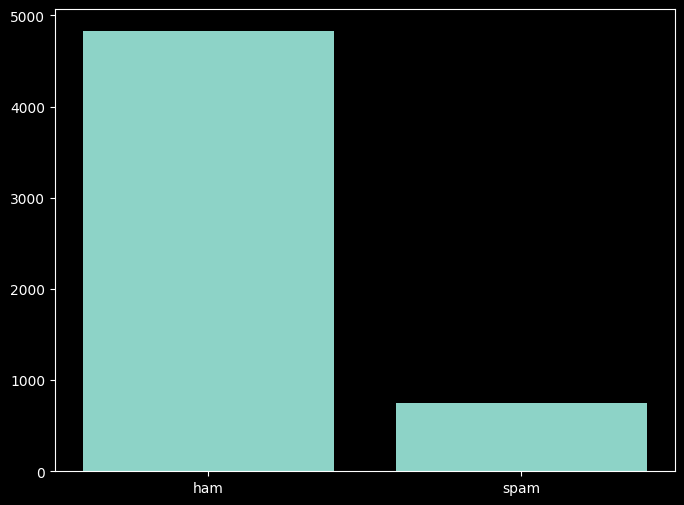

In [13]:
plt.figure(figsize = (8,6))
x, y = np.unique(df['labels'], return_counts=True)
plt.bar(x, y, align='center')
plt.gca().set_xticks(x)
plt.show()

In [12]:
df['labels'].value_counts()

,count
labels,
ham,4825
spam,747



# Tansform Labels into numbers

In [14]:
df['labels'] = df['labels'].map({'ham': 0, 'spam': 1})

In [15]:
df.head()

,labels,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Extract features and labels from the data

In [16]:
features = df['text']
labels = df['labels'].values

# Split the data into training and testing

In [17]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Map the text into numbers using CountVectorizer

In [18]:
featurizer = CountVectorizer()
Xtrain = featurizer.fit_transform(train_data)
Xtest = featurizer.transform(test_data)

In [ ]:
Xtrain

# Instantiate Lineaar SVC

In [19]:
model = LinearSVC(max_iter=2000)

# Train and test the model

In [20]:
model.fit(Xtrain, train_labels)


LinearSVC(max_iter=2000)

# Get the class predictions from the model

In [21]:
y_pred = model.predict(Xtest)

# Create Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

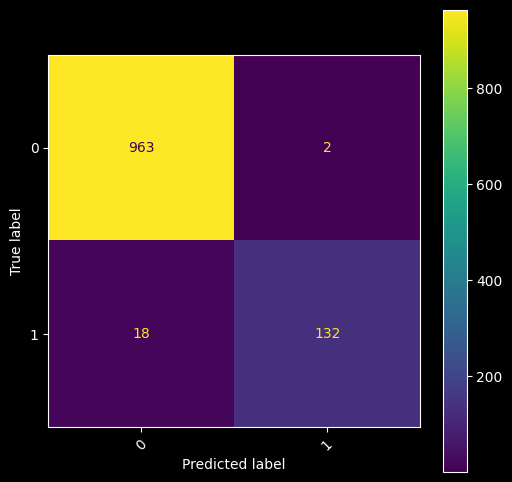

In [23]:
cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(6)
fig.set_figheight(6)
plt.show()

# Calculate Accuracy, Precision, Recall and F1_Score

In [24]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [25]:
print("Accuracy : %2.2f" % (accuracy_score(test_labels, y_pred, normalize=True)))
print("Precision : %2.2f" % (precision_score(test_labels, y_pred, average = 'macro')))
print("Recall : %2.2f" % (recall_score(test_labels, y_pred, average = 'macro')))
print("F1_Score : %2.2f" % (f1_score(test_labels, y_pred, average = 'macro')))

Accuracy : 0.98
Precision : 0.98
Recall : 0.94
F1_Score : 0.96


# Enter your custom emails to check the model

In [26]:
email = "Hope you are fine and doing well. Could you please forward me the list of students?"

In [27]:
email = featurizer.transform([email])

In [28]:
print(model.predict(email))

[0]


In [29]:
email2 = "Congratulation!. you have won 5000 dollars. Click the link below to get the money"

In [30]:
email2 = featurizer.transform([email2])

In [31]:
print(model.predict(email2))

[0]
